------------------

# Single Cell RNA Sequence Data

------------------

In [1]:
# Code from - https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
# 
# URL for annotated Data - https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html
# 

In [2]:
# !pip install scanpy
# !pip install anndata

In [3]:
# Imports
# -------

import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt

import scanpy as sc
import anndata

# sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_header()
# sc.settings.set_figure_params(dpi=80, facecolor='white')

In [4]:
# Making a folder for storing analysis results
# --------------------------------------------
results_file = 'pbmc3k.h5ad'

# Reading in Local Environment
# ----------------------------
adata = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/',
                       var_names='gene_symbols',
                       cache=True)
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [5]:
adata.var_names_make_unique() 
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [6]:
# Looking at the raw data
#
adata.X[0,:]

<1x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 781 stored elements in Compressed Sparse Row format>

In [7]:
# Looking at the raw data
#
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

------------

### `This data has 2700 cells and 32738 genes.`

------------

In [8]:
# ------------------------------------
# These are the genes with gene id's
# ------------------------------------
#    MIR1302-10 - RNA gene
#    FAM138A    - RNA gene
# 
# We have 32738 genes in total
# ------------------------------------
display(adata.var)

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [9]:
# These are also the genes 
# ------------------------
display(adata.var_names)

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [10]:
# These are the cells
# -------------------
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2700)

In [11]:
# ----------------
# Looking the Data
# ----------------
df_sc = adata.to_df()
df_sc.reset_index(inplace=True)
print("Shape of Data - ",df_sc.shape)
display(df_sc.head())

Shape of Data -  (2700, 32739)


,index,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
0,AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


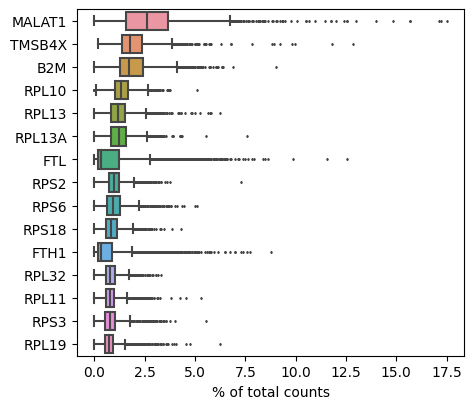

In [12]:
# Plotting
# --------
# pl -> Plotting library for ScanPy

# Showing genes with the highest frequency
# --------------------------------------------------
sc.pl.highest_expr_genes(adata, n_top=15, )

---------------

### Basic Filtering

---------------

In [13]:
# This is an industry standard.
# We can filter by values that we require

# Filtering out cells with fewer than 200 genes
sc.pp.filter_cells(adata, min_genes=200)

# Filtering out genes that are found in fewer than 3 cells.
sc.pp.filter_genes(adata, min_cells=3)

In [14]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [15]:
display(adata.var)
display(adata.obs)

,gene_ids,n_cells
AL627309.1,ENSG00000237683,9
AP006222.2,ENSG00000228463,3
RP11-206L10.2,ENSG00000228327,5
RP11-206L10.9,ENSG00000237491,3
LINC00115,ENSG00000225880,18
...,...,...
AC145212.1,ENSG00000215750,16
AL592183.1,ENSG00000220023,323
AL354822.1,ENSG00000215615,8
PNRC2-1,ENSG00000215700,110


,n_genes
AAACATACAACCAC-1,781
AAACATTGAGCTAC-1,1352
AAACATTGATCAGC-1,1131
AAACCGTGCTTCCG-1,960
AAACCGTGTATGCG-1,522
...,...
TTTCGAACTCTCAT-1,1155
TTTCTACTGAGGCA-1,1227
TTTCTACTTCCTCG-1,622
TTTGCATGAGAGGC-1,454


In [16]:
# # Looking the Data
# # ----------------

# df_sc = adata.to_df()
# df_sc.reset_index(inplace=True)
# print("Shape of Data - ",df_sc.shape)
# display(df_sc.head())

--------------------------------------
### Mitochonrial Genes - Quality Control

Let’s assemble some information about mitochondrial genes, which are important for quality control.

High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane. 

Cited from - `“Simple Single Cell” workflows (Lun, McCarthy & Marioni, 2017)`

--------------------------------------

In [17]:
# display(adata.var)
# display(adata.obs)

In [18]:
# Since this is the data for a mouse, Mitochondrial genes are annotated from "MT" to "mt"

# Annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('MT-') 



In [19]:
# Calculating the Metrics - Quality Control
# -----------------------------------------
sc.pp.calculate_qc_metrics(adata, 
                           qc_vars=['mt'],
                           percent_top=None, 
                           log1p=False, 
                           inplace=True)

#
# pct - pressure cycle technology - 
#
#   minimizes sample pre-treatment steps and minimizes sample loss for low volumes of valuable samples
#
#   Reference - https://www.creative-proteomics.com/ngpro/pct-dia-services.html

In [20]:
display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0
...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


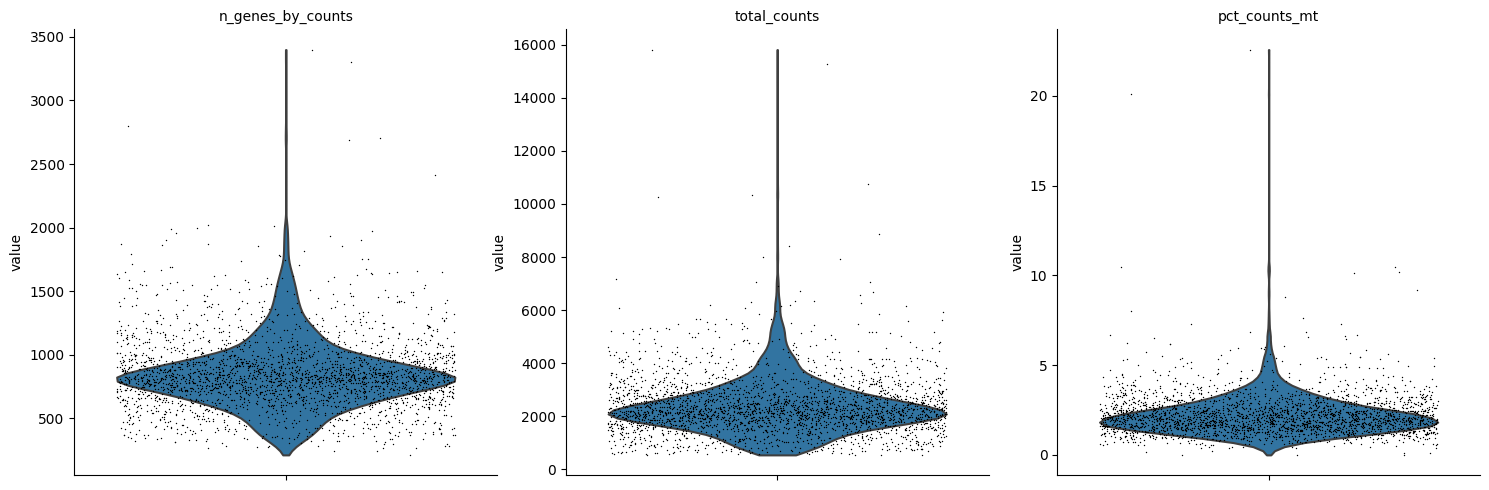

In [21]:
# Plotting - Violin Plot 
# -----------------------
#
# This shows the distribution of the metric's results.
#
# A violin plot of some of the computed quality measures:
# - the number of genes expressed in the count matrix
# - the total counts per cell
# - the percentage of counts in mitochondrial genes
# -------------------------------------------------------------
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

Remove cells that have too many mitochondrial genes expressed or too many total counts

-------------------------------

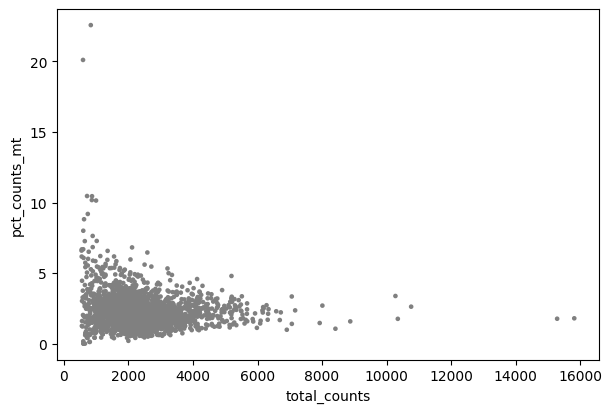

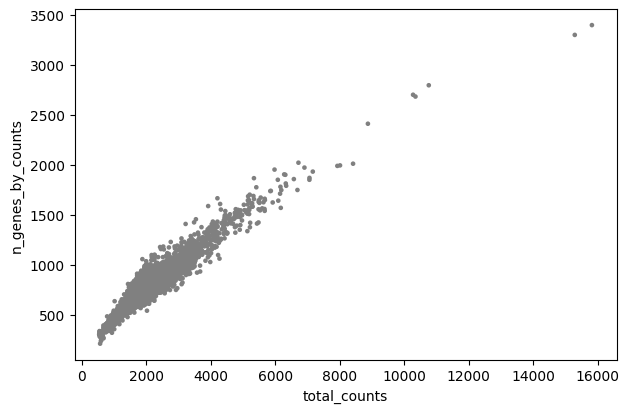

In [22]:
# Plotting - Scatterplot
# ----------------------
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

----------------------------------------

----------------------------------------

In [23]:
display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0
...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [24]:
# Filtering by Slicing the anndata
# --------------------------------
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

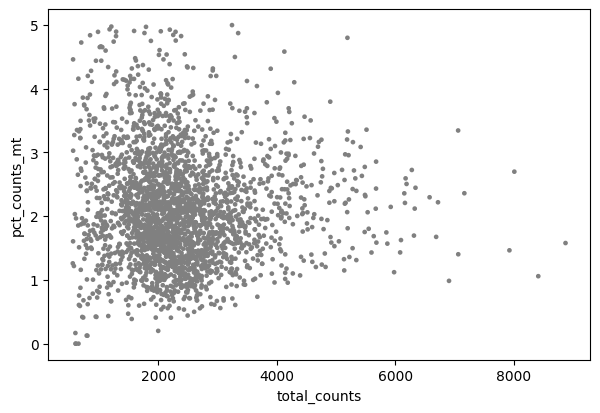

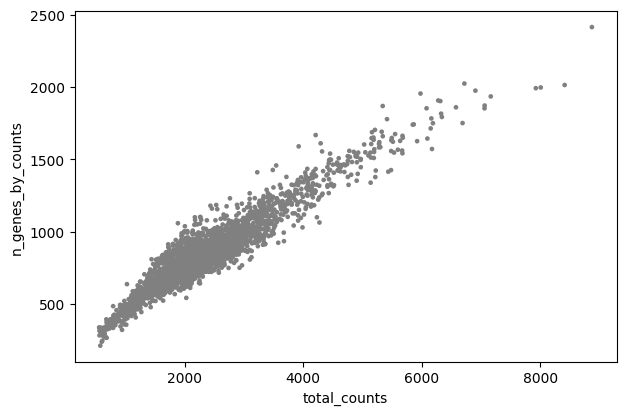

In [25]:
# Plotting - Scatterplot
# ----------------------
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [26]:
# Raw matrix before normalization
# 
# Summing all the values of each individual cell
print(adata.X[0,:].sum())
print(adata.X[1,:].sum())
print(adata.X[20,:].sum())
print(adata.X[40,:].sum())

2419.0
4903.0
3281.0
2357.0


In [27]:
# Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, 
#  so that counts become comparable among cells
#
# Normalization is done to - make the column sum nearly the same
#    Number of cells should be comparable for analysis
# 
sc.pp.normalize_total(adata, target_sum=10000)

In [28]:
# Raw matrix after normalization
# 
# Summing all the values of each individual cell
print(adata.X[0,:].sum())
print(adata.X[1,:].sum())
print(adata.X[20,:].sum())
print(adata.X[40,:].sum())

9999.966
10000.049
10000.0
10000.033


In [29]:
# Applying log yo the data
#
# log is applied after adding 1 (+1) to the values. 
# This is done to make any 0 values 1.
# 
sc.pp.log1p(adata)

In [30]:
# Raw matrix after normalization
# 
# Summing all the values of each individual cell
print(adata.X[0,:].sum())
print(adata.X[1,:].sum())
print(adata.X[20,:].sum())
print(adata.X[40,:].sum())

1605.8203
2027.8444
1842.5238
1715.6285


In [31]:
# 
# Most of the analysis will be done with variable genes, so we need to filter them
# 
# Identifying the higly variable genes
# ------------------------------------
sc.pp.highly_variable_genes(adata, 
                            min_mean=0.0125, 
                            max_mean=3, 
                            min_disp=0.5)

display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0,False,0.013556,1.432845,-0.624328
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0,False,0.004696,1.458631,-0.573416
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0,False,0.005673,1.325459,-0.836358
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0,False,0.002644,0.859264,-1.756848
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0,False,0.027437,1.457477,-0.575693
...,...,...,...,...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0,False,0.027441,1.784637,0.070275
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0,False,0.485051,1.859941,-0.437388
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0,False,0.012157,1.781924,0.064919
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0,False,0.160366,1.567491,-0.358474


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


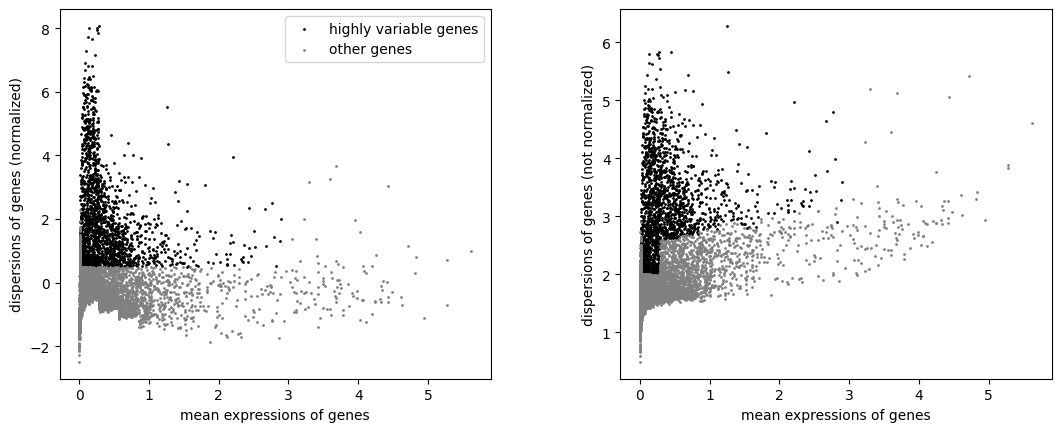

In [32]:
# Plotting the highly variable genes
# ----------------------------------
sc.pl.highly_variable_genes(adata)

In [33]:
# Set the .raw attribute of the AnnData object to the normalized and logarithmized 
# raw gene expression for later use in differential testing and visualizations of gene expression. 
# This simply freezes the state of the AnnData object.
# ------------------------------------------------------------------------------------------------
adata.raw = adata

# We can get back an AnnData of the object in .raw by calling .raw.to_adata().
#

In [34]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

------------------------------

The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. 

In that case, the step actually do the filtering below is unnecessary, too.

------------------------------

In [35]:
# Filtering the highly variable data
# 
adata = adata[:, adata.var.highly_variable]

In [36]:
display(adata.var)
display(adata.obs)

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
TNFRSF4,ENSG00000186827,155,False,155,0.077407,94.259259,209.0,True,0.277410,2.086050,0.665406
CPSF3L,ENSG00000127054,202,False,202,0.094815,92.518519,256.0,True,0.385194,4.506987,2.955005
ATAD3C,ENSG00000215915,9,False,9,0.009259,99.666667,25.0,True,0.038252,3.953486,4.352607
C1orf86,ENSG00000162585,501,False,501,0.227778,81.444444,615.0,True,0.678283,2.713522,0.543183
RER1,ENSG00000157916,608,False,608,0.298148,77.481481,805.0,True,0.814813,3.447533,1.582528
...,...,...,...,...,...,...,...,...,...,...,...
ICOSLG,ENSG00000160223,34,False,34,0.016667,98.740741,45.0,True,0.082016,2.585818,1.652185
SUMO3,ENSG00000184900,570,False,570,0.292963,78.888889,791.0,True,0.804815,4.046776,2.431045
SLC19A1,ENSG00000173638,31,False,31,0.018519,98.851852,50.0,True,0.058960,3.234231,2.932458
S100B,ENSG00000160307,94,False,94,0.076667,96.518519,207.0,True,0.286282,3.042992,1.078783


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [37]:
# Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed.
# 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [38]:
# Scale the data to unit variance.
# Clip values exceeding standard deviation 10.
# 
sc.pp.scale(adata, max_value=10)

In [39]:
# Creating a Dataframe before applying PCA
#
adata_df = adata.to_df().transpose()
display(adata_df.head())
print(adata_df.shape)

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,...,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
TNFRSF4,-0.171470,-0.214582,-0.376888,-0.285241,-0.256484,-0.271255,-0.095658,-0.158133,4.861766,-0.124531,...,-0.103841,-0.153954,-0.216444,-0.352371,-0.399291,-0.290368,-0.386344,-0.207090,-0.190328,-0.333789
CPSF3L,-0.280812,-0.372653,-0.295085,-0.281735,-0.220394,-0.264511,-0.276485,-0.275627,-0.230549,-0.233736,...,-0.255254,-0.225480,-0.236016,3.470952,-0.343465,2.638308,2.652699,-0.250464,-0.226334,-0.253588
ATAD3C,-0.046677,-0.054804,-0.057527,-0.052227,-0.046800,-0.050418,-0.042734,-0.045692,-0.048269,-0.041312,...,-0.041731,-0.042188,-0.045897,-0.054041,-0.061794,-0.054510,-0.058686,-0.046397,-0.043999,-0.052716
C1orf86,-0.475169,-0.683391,-0.520972,-0.484929,-0.345859,-0.445480,-0.460367,-0.462676,2.811605,-0.366757,...,-0.413459,-0.350291,2.757427,-0.441120,-0.630639,-0.554384,-0.545443,-0.409737,-0.354661,-0.425292
RER1,-0.544024,0.633951,1.332648,1.572680,-0.333409,-0.492662,-0.523118,-0.524482,-0.371003,-0.371873,...,2.220671,-0.344358,-0.386583,-0.482631,0.814203,-0.666646,1.201866,2.193954,-0.350005,-0.457937


(1838, 2638)


--------------------------------------
### Dimensionality Reduction - Principal Component Analysis

`This reveals the main axes of variation and denoises the data.`

-------------------------------

In [40]:
# Principal Component Analysis (PCA)
# ----------------------------------

# ------------------
#   Using Scanpy
# ------------------
sc.tl.pca(adata, svd_solver='arpack', copy=True, n_comps=40)

# # Viewing the components - with respect to variance of Data
# sc.pl.pca_variance_ratio(adata, log=True)

# ------------------
#   Using sklearn
# ------------------
from sklearn.decomposition import PCA
n_comp = 40
pca_object = PCA(n_components=n_comp, random_state=500)
pca_object.fit(adata_df)
adata_pca_res = pd.DataFrame(pca_object.components_.transpose(),
                             columns=['PC%s' % _ for _ in range(n_comp)],
                             index=adata_df.columns)
display(adata_pca_res.head())

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
AAACATACAACCAC-1,-0.018714,-0.000630,0.002546,-0.015565,0.000941,0.001263,-0.024951,-0.005462,0.024871,-0.012357,...,0.007454,-0.008579,0.026743,-0.017299,-0.018946,0.034708,0.014819,0.003030,-0.007869,0.011259
AAACATTGAGCTAC-1,-0.024239,0.038657,-0.011337,0.039168,-0.024639,0.010299,-0.007560,0.001911,-0.015492,0.004388,...,0.021967,0.008852,-0.023231,-0.010292,0.015175,0.018267,-0.012310,0.017586,-0.025887,-0.012970
AAACATTGATCAGC-1,-0.009513,-0.007464,0.004850,-0.012628,0.014377,0.014254,-0.031174,0.023526,-0.008498,-0.022411,...,-0.013326,-0.029849,-0.018055,-0.017862,-0.013402,-0.032310,-0.016665,-0.000764,0.005024,0.012576
AAACCGTGCTTCCG-1,0.034772,-0.007859,-0.005591,0.006426,0.027207,0.004512,0.004615,0.015506,0.000164,-0.003232,...,-0.028360,-0.007810,-0.021973,-0.000660,-0.015206,-0.005970,0.005815,0.023565,0.022795,-0.000434
AAACCGTGTATGCG-1,0.002909,-0.035916,-0.005346,0.034946,-0.013307,-0.046746,0.003610,0.000535,-0.013166,-0.000352,...,-0.008190,0.013556,-0.023230,0.015903,0.000748,-0.029990,-0.001790,0.018618,-0.026040,-0.005513


         Falling back to preprocessing with `sc.pp.pca` and default params.


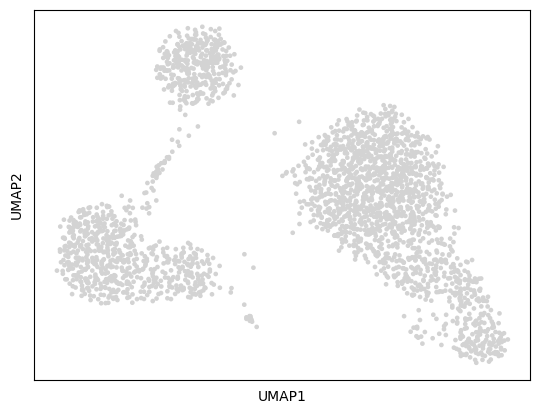

In [41]:
# Computing Neighborhood Graph
# 
# Computing the neighborhood graph of cells using the PCA representation of the data matrix
# 
sc.pp.neighbors(adata)

"""
Embedding the neighborhood graph
We suggest embedding the graph in two dimensions using UMAP (McInnes et al., 2018),. 
It is potentially more faithful to the global connectivity of the manifold than tSNE, i.e.,
it better preserves trajectories. 
In some ocassions, you might still observe disconnected clusters and similar connectivity violations. 

They can usually be remedied by running:
"""
# sc.tl.paga(adata)
# sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(adata, init_pos='paga')
#    
# Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that 
#   can be used for visualisation similarly to t-SNE, 
#   but also for general non-linear dimension reduction.
# 
sc.tl.umap(adata)
sc.pl.umap(adata, use_raw=False)

------------------

### Louvain Clustering (ScanPy)

------------------

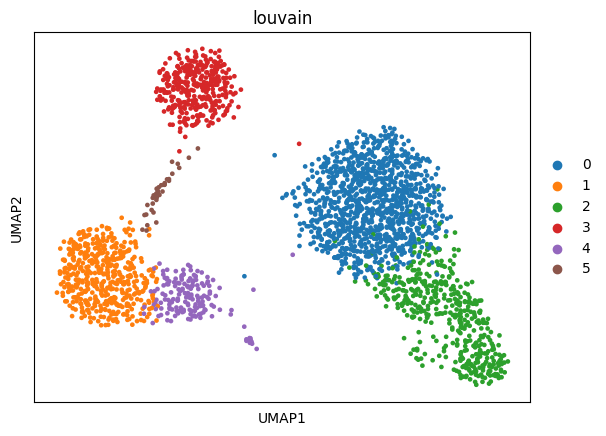

In [43]:
# Louvain Clustering using ScanPy
# -------------------------------
sc.tl.louvain(adata)
sc.pl.umap(adata, color=['louvain'])

------------------

### Leiden Clustering (ScanPy)

------------------

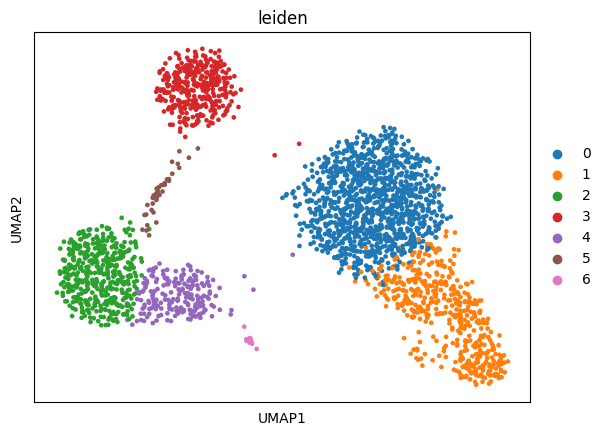

In [44]:
# Leiden Clustering
# -----------------
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

-----------------

### K-Means Clustering (sklearn)

-----------------

In [ ]:
X = adata_pca_res.copy()
X.head(2)

In [ ]:
# K-Means Clustering using SkLearn
# --------------------------------
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
adata_pca_res['kmeans_cluster_labels'] = kmeans.fit_predict(X)
cluster_labels = kmeans.fit_predict(X)
adata_pca_res.head()

In [ ]:
# Plotting the Clusters in Kmeans
# -------------------------------
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(x=adata_pca_res['PC4'], 
                y=adata_pca_res['PC1'], 
                hue=adata_pca_res['kmeans_cluster_labels'], 
                palette='bright')
plt.show()

-----------------------------------

### Spectral Clustering (sklearn)

-----------------------------------


In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
spec_cl = SpectralClustering(n_clusters=8)
spec_cl.fit(X)
adata_pca_res['spectral_cluster_labels'] = spec_cl.fit_predict(X)
cluster_labels = spec_cl.fit_predict(X)
adata_pca_res.head()

In [ ]:
# Plotting the Clusters in Kmeans
# -------------------------------
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(x=adata_pca_res['PC0'], 
                y=adata_pca_res['PC1'], 
                hue=adata_pca_res['spectral_cluster_labels'], 
                palette='bright')
plt.show()

------------------------

### Embedding with Umap for Better Clusters

------------------------

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.
  
  
----------------------------------------------------------------------------------------------

In [ ]:
import umap
standard_embedding = umap.UMAP(random_state=42).fit_transform(X)
print(standard_embedding)

In [ ]:

umapped_df = pd.DataFrame(columns=['UMAP1', 'UMAP2'], index=X.index)
umapped_df['UMAP1'] = standard_embedding[:,0]
umapped_df['UMAP2'] = standard_embedding[:,1]
umapped_df.head()

In [ ]:
X_ = umapped_df.copy()

In [ ]:
# Applying Kmeans Clustering
# --------------------------
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_)
umapped_df['kmeans_cluster_labels'] = kmeans.fit_predict(X_)
cluster_labels = kmeans.fit_predict(X_)
display(umapped_df.head())


# Plotting the Clusters in Kmeans
# -------------------------------
plt.figure(figsize=(12,8))
sns.scatterplot(x=umapped_df['UMAP1'], 
                y=umapped_df['UMAP2'], 
                hue=adata_pca_res['kmeans_cluster_labels'], 
                palette='bright')
plt.show()

In [ ]:
# Applying Spectral Clustering
# -----------------------------
spec_cl = SpectralClustering(n_clusters=8)
spec_cl.fit(X_)
umapped_df['spectral_cluster_labels'] = spec_cl.fit_predict(X_)
cluster_labels = spec_cl.fit_predict(X_)
umapped_df.head()

# Plotting the Clusters in Kmeans
# -------------------------------
plt.figure(figsize=(12,8))
sns.scatterplot(x=umapped_df['UMAP1'], 
                y=umapped_df['UMAP2'], 
                hue=umapped_df['spectral_cluster_labels'], 
                palette='bright')
plt.show()